In [12]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [13]:
data = './messidor-dataset/messidor-data-only.csv.txt'
df = pd.read_csv(data)
df.head()
# df.fillna(999, inplace=True)

qual_assesment  pre_screening  ma_a_0.5  ma_a_0.6  ma_a_0.7  ma_a_0.8  \
1               1             22        22        22        19        18   
1               1             24        24        22        18        16   
1               1             62        60        59        54        47   
1               1             55        53        53        50        43   
1               1             44        44        44        41        39   

   ma_a_0.9   ma_a_1.0   ex_a_0.5   ex_a_0.6  ex_a_0.7  ex_a_0.8  ex_a_0.9  \
1        14  49.895756  17.775994   5.270920  0.771761  0.018632  0.006864   
1        13  57.709936  23.799994   3.325423  0.234185  0.003903  0.003903   
1        33  55.831441  27.993933  12.687485  4.852282  1.393889  0.373252   
1        31  40.467228  18.445954   9.118901  3.079428  0.840261  0.272434   
1        27  18.026254   8.570709   0.410381  0.000000  0.000000  0.000000   

   ex_a_1.0  Unnamed: 14  eucledian_distance  diameter  am-fm-class  label  
1  0.003923     0.003923            0.486903  0.100025            1      0  
1  0.003903     0.003903            0.520908  0.144414            0      0  
1  0.041817     0.007744            0.530904  0.128548            0      1  
1  0.007653     0.001531            0.483284  0.114790            0      0  
1  0.000000     0.000000            0.475935  0.123572            0      1

In [40]:
X =  df.drop(columns=['label'])
y = df['label']
print(X.shape)
print(y.shape)

(1151, 18)
(1151,)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(805, 18)
(346, 18)


In [52]:
dt = tree.DecisionTreeClassifier(random_state=0, max_depth=5)
dt = dt.fit(x_train, y_train)
clf = dt
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy)

0.630057803468208


In [53]:
plt.figure(figsize=(300, 300))
features = df.columns
classes = ['1', '2']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
# plt.show()
plt.savefig('fig.png')

In [23]:
params = {'max_depth': [2,4,6,8],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)
model = gcv.best_estimator_
model.fit(x_train,y_train)
accuracy_2 = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_2)

0.6284722222222222


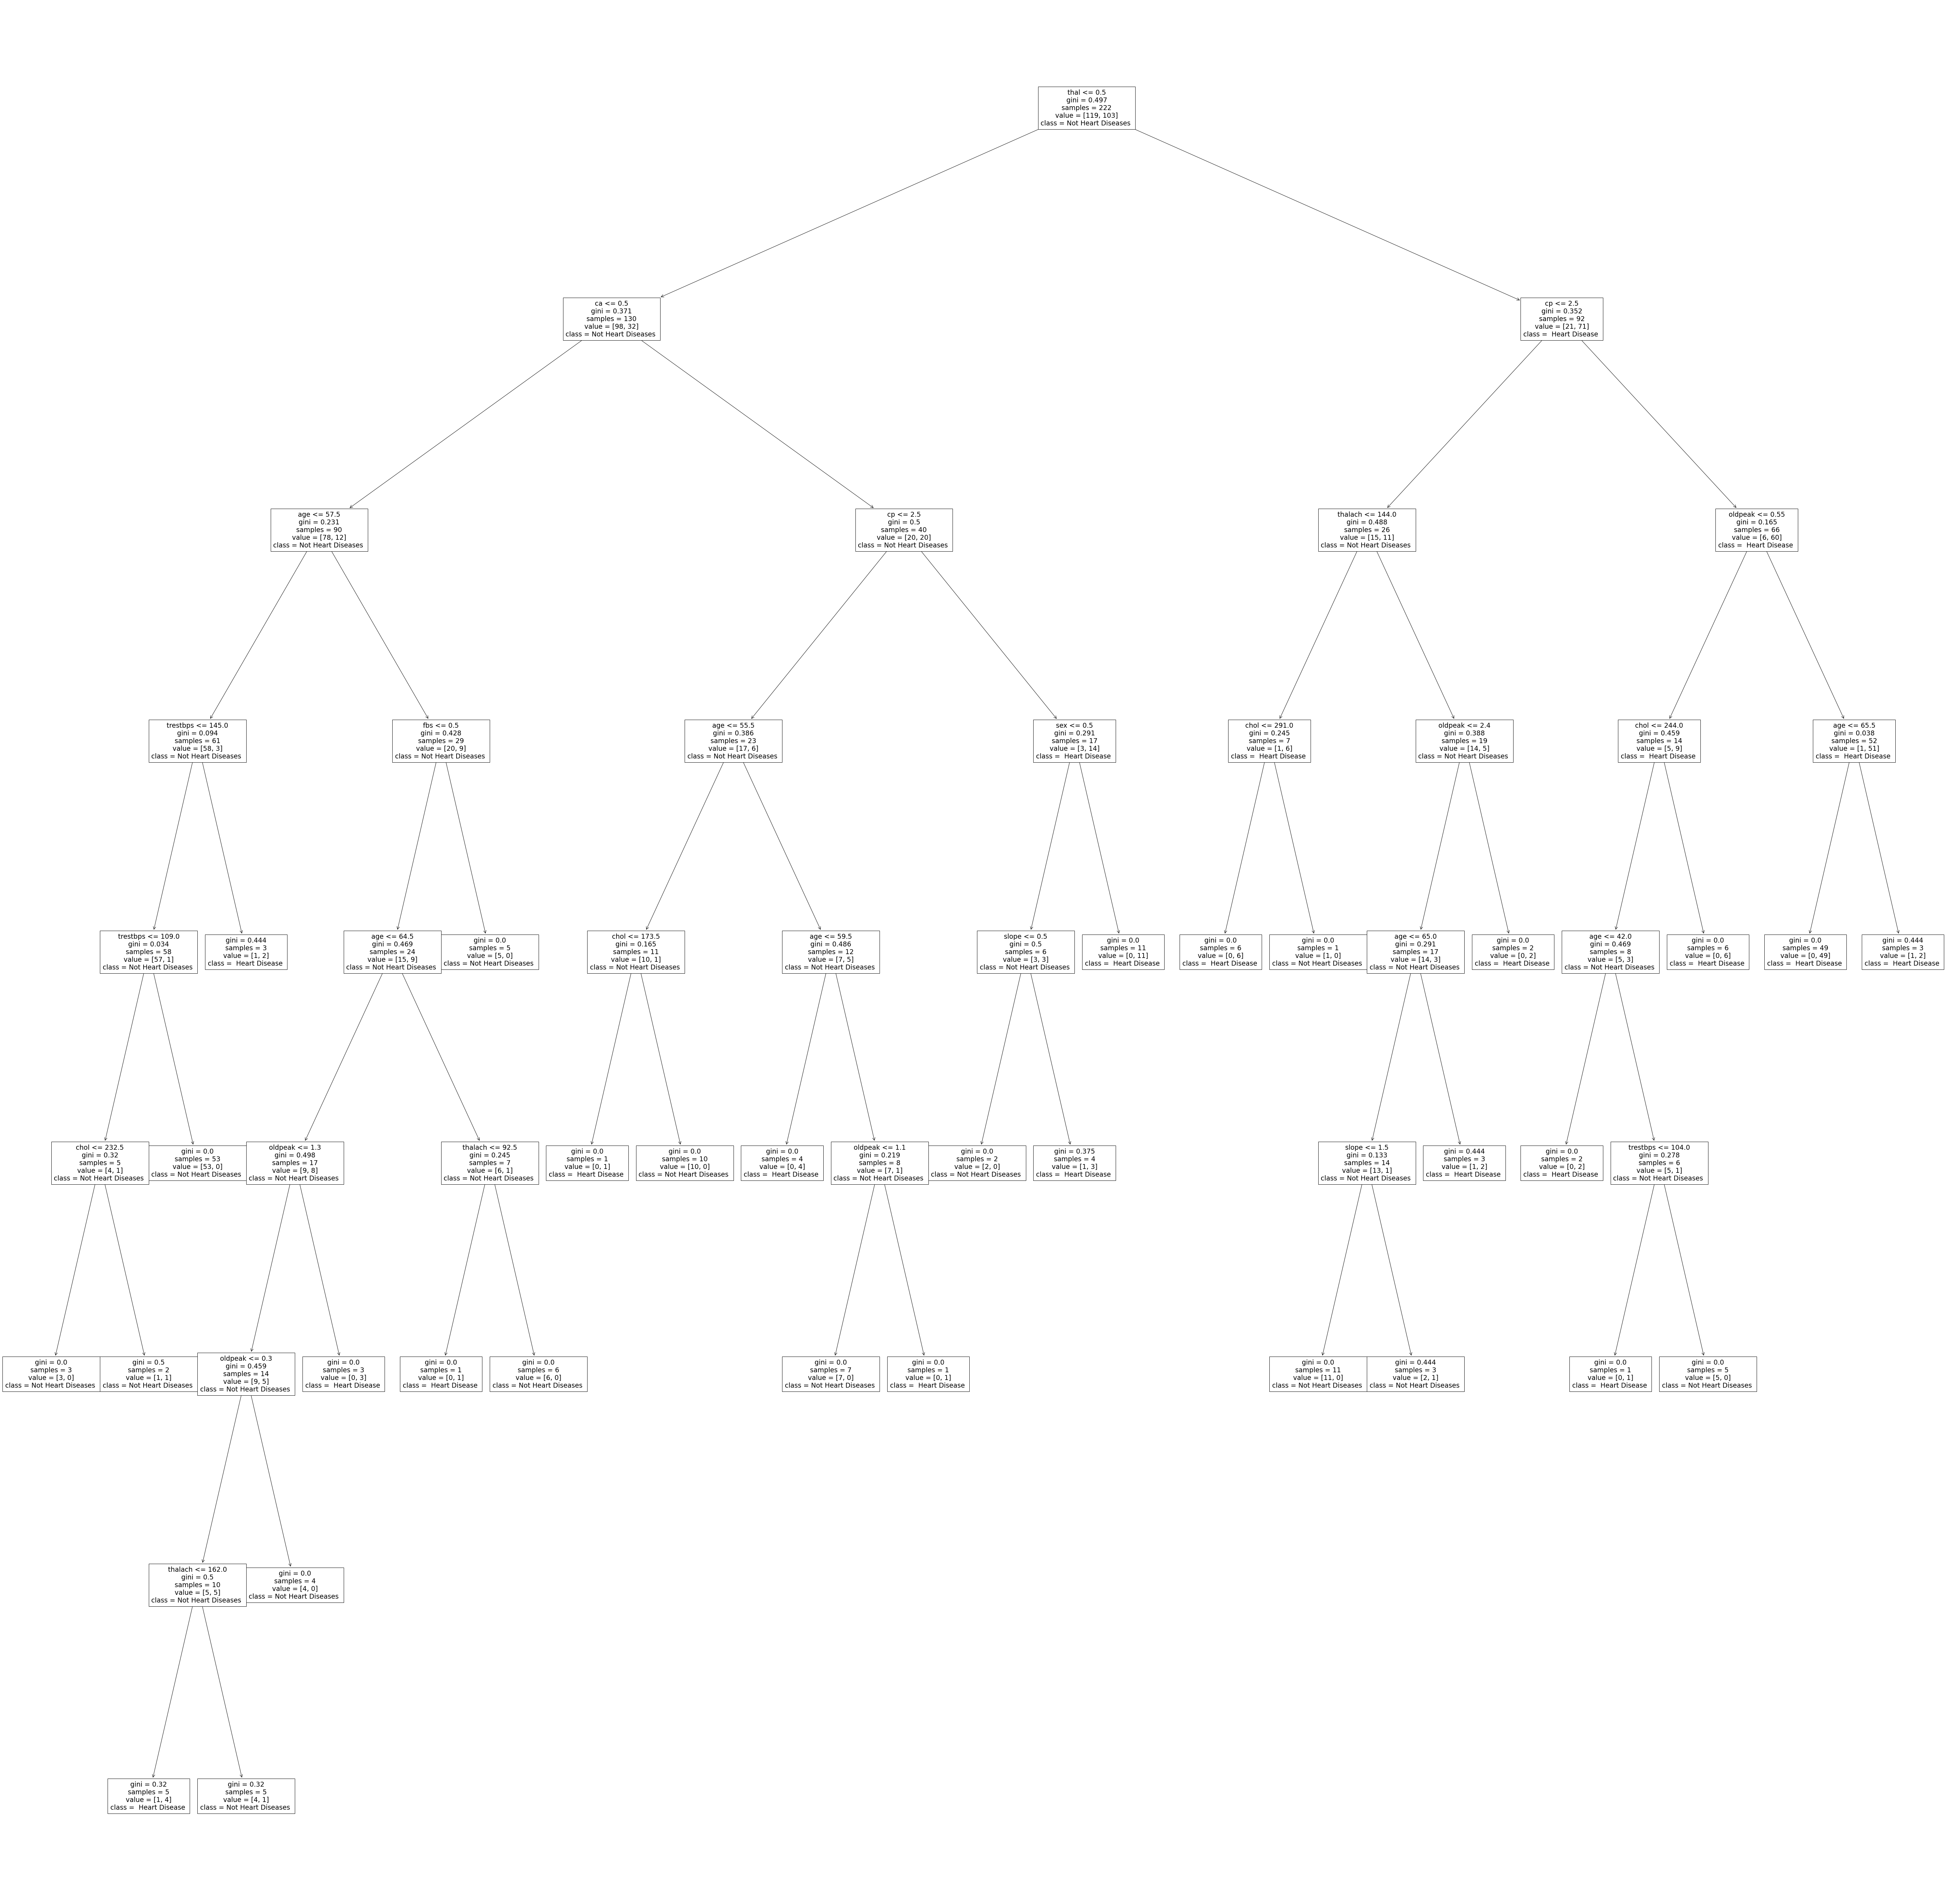

In [14]:
plt.figure(figsize=(100, 100))
features = df.columns
classes =  ['Not Heart Diseases ', ' Heart Disease ']
# classes = ['1','2','3','4','5','6', '7','8','9','10','11','12']
tree.plot_tree(model,feature_names=features,class_names=classes)
plt.show()